# 1-7. 프로젝트: 가위바위보 분류기 만들기
직접 촬영한 사진을 바탕으로 가위바위보 분류기를 만드는 프로젝트를 진행하였습니다.


## 데이터 준비하기

### 데이터 만들기
노트북의 전면 카메라를 사용하여 가위, 바위, 보 이미지를 각 100장씩 만들었습니다. 일일이 찍는 것은 어려움이 있어 구글의 teachable machine(https://teachablemachine.withgoogle.com)이라는 사이트를 활용하여 보다 이미지 데이터를 손쉽게 만들었습니다. 사이트에서 image project를 선택하면 웹캠이 구동되고 클래스별 데이터를 직접 촬영할 수 있는 화면이 나타납니다.


### 디렉토리 만들기
프로젝트용 디렉토리인 rock_scissor_paper 및 각각의 하위디렉토리를 만들었습니다.

가위 : mkdir -p ~/aiffel/rock_scissor_paper/scissor

바위 : mkdir -p ~/aiffel/rock_scissor_paper/rock

보 : mkdir -p ~/aiffel/rock_scissor_paper/paper

디렉토리 확인 : ls -l ~/aiffel/rock_scissor_paper

### 데이터 불러오기, Resize 하기
techable machine 사이트를 이용하여 만든 이미지 데이터의 크기는 28x28입니다. 사이즈를 바꾸어주기 위해서 pillow 라이브러리를 설치하고 필요한 라이브러리를 불러옵니다.

In [51]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob
import tensorflow as tf
from tensorflow import keras
import numpy as np
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


#### 가위, 바위, 보 이미지를 불러와서 28x28 사이즈로 변경하겠습니다.

In [52]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [53]:
import os
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [54]:
import os
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


#### 이어서 가위, 바위, 보에 각각 라벨링을 하겠습니다.

In [55]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=9600   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 9300 입니다.
x_train shape: (9600, 28, 28, 3)
y_train shape: (9600,)


#### 학습용 이미지와 라벨을 확인해보겠습니다.

라벨:  0


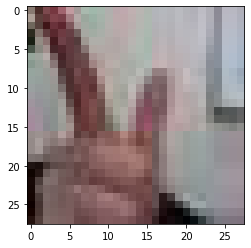

In [56]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 딥러닝 네트워크 설계 및 학습시키기
먼저 input_shape를 컬러 값이 들어가도록 28,28,3으로 수정을 합니다. 또한 우리는 3개의 클래스가 필요하니 Dense 레이어를 3으로 변경합니다. 후에 설계된 네트워크로 epoch를 10으로 설정 후 학습시킵니다.

In [73]:
#바꿔 볼 수 있는 하이퍼파라미터들

n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=70

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                51264     
_________________________________________________________________
dense_35 (Dense)             (None, 3)               

300/300 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 0.9997
Epoch 70/70
300/300 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.9999


### 학습 데이터 또한 같은 로직으로 만들어줍니다.

In [74]:
def load_test_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test"
(x_test, y_test)=load_test_data(test_image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
10/10 - 0s - loss: 3.1647 - accuracy: 0.4600
test_loss: 3.164748430252075 
test_accuracy: 0.46000000834465027


n_epoch 값을 10~100까지 시도해봤는데 70 이후 부터는 오히려 정확도가 낮아지는 현상이 발생하였습니다. 따라서 값을 70으로 설정하였습니다.
n_dense 또한 64를 초과하는 값은 정확도를 감소시켜서 64가 최적의 값이라 생각했습니다.

평가 : 정말 솔직하게 코드 하나, 로직 하나 제대로 이해하지를 못했고 배운 것은 많지만 제가 단 하나도 소화를 하지 못한다는 것을 깨달았습니다. 하이퍼파라미터를 바꾼다고는 이해가 선행되지 않아 크게 와닿지가 않았습니다. 특히 아무리 코드를 이해하려고 해도 할 수 없어 많이 답답하였고 위 프로젝트 또한 시간을 두고 계속 반복적으로 봐야한다고 생각합니다. 